### 01. Finding the Problem - Application
 Species of the plant by its shape

### 02. Collecting Dataset
Scikit-learn Iris Dataset
* Input: Sepal Length, Sepal Width, Petal Length and Petal Width 
* Output: irises (Setosa, Versicolour, and Virginica)


### 03.Load and Summarize Dataset


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
dataset=load_iris()
# print(dataset.feature_names) #['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

### 04. Segregating Dataset into X & Y

In [2]:
X=pd.DataFrame(dataset.data,columns=dataset.feature_names)
y=dataset.target
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
X.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

### 05. Splitting Dataset to Train & Test

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train ,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape



(120, 4)

### 06. Finding best max_depth Value

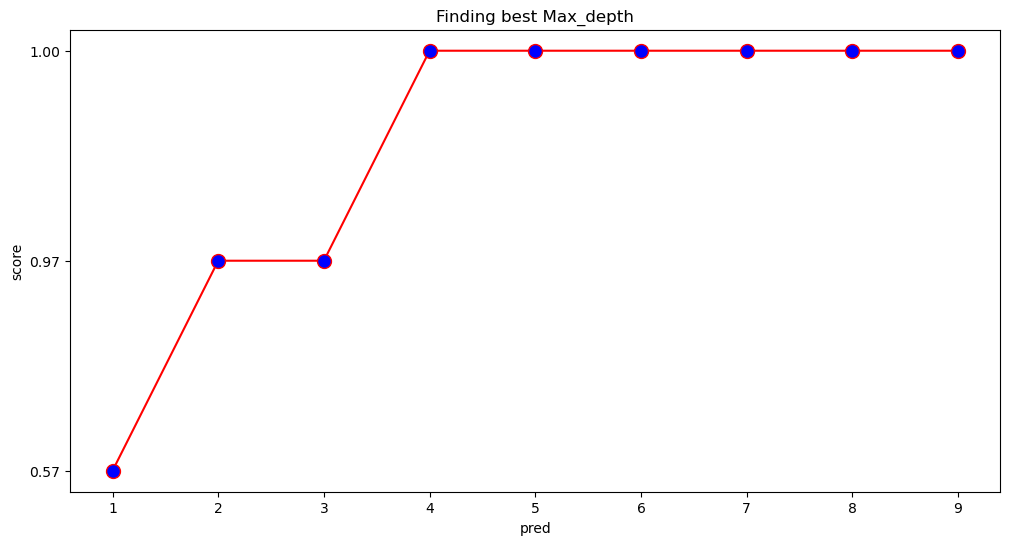

In [8]:
max_depth=[]
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

for i in range(1,10):
    model=DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    score=accuracy_score(y_test,pred)
    max_depth.append(score.__format__('.2f'))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,10),max_depth,color='red',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Finding best Max_depth')
plt.xlabel('pred')
plt.ylabel('score')
plt.show()


### 07.Model Training

In [5]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)
model.fit(X_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

### 08.Model Prediction

In [6]:
Y_pred=model.predict(X_test)
print(Y_pred)

print(np.concatenate((Y_pred.reshape(len(Y_pred),1),y_test.reshape(len(y_test),1)),1))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [7]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model:{0}%".format(accuracy_score(y_test,Y_pred)*100))

Accuracy of the model:100.0%


|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



<module 'sklearn.tree' from 'c:\\Users\\SIVA1201\\anaconda3\\envs\\artsci\\lib\\site-packages\\sklearn\\tree\\__init__.py'>

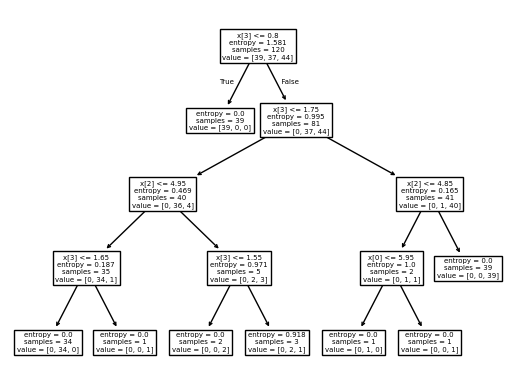

In [13]:
#Decision making in decision tree
from sklearn import tree
text_representation = tree.export_text(model)
print (text_representation)
tree.plot_tree(model)
tree
